# Building a predictive maintenance model with SMOTE()

I will create a classification model to predict maintance model.
Data --> failure.csv

## Importing Libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## EDA - Exploratory Data Analysis

In [2]:
df=pd.read_csv("failure.csv")

In [3]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
df.tail()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,2015-11-02,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,0


In [5]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

There are no empty cells in my data.

## Feature Engineering

I will delete date column because i don't need it.

In [10]:
df.drop("date",axis=1)

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
124489,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


We have a device column but its values aren't integer or float, they are object. So i must transform its values to 0 and 1 (False and True) with get_dummies function.

In [15]:
df=pd.get_dummies(df)

In [17]:
df.sample()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,...,device_Z1F1HSWK,device_Z1F1Q9BD,device_Z1F1R76A,device_Z1F1RE71,device_Z1F1RJFA,device_Z1F1VMZB,device_Z1F1VQFY,device_Z1F26YZB,device_Z1F282ZV,device_Z1F2PBHX
7844,0,0,0,0,0,8,307240,0,0,3,...,False,False,False,False,False,False,False,False,False,False


## Determining the target variable

In [18]:
x=df.drop("failure",axis=1)
y=df[["failure"]]

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state=42)

## Modelling

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
g=GaussianNB()

In [23]:
g.fit(x_train,y_train)

GaussianNB()

In [24]:
g_prediction=g.predict(x_test)

In [25]:
accuracy_score(g_prediction,y_test)

0.997911562713362

I received a very high accuracy score. But i made an error. Our failure column has just 106 "1" value. If our model give all values "0" value accuracy score will be very high. We can solve this problem with SMOTE().

In [28]:
df.failure.value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

In [29]:
import seaborn as sns

<Axes: xlabel='failure', ylabel='count'>

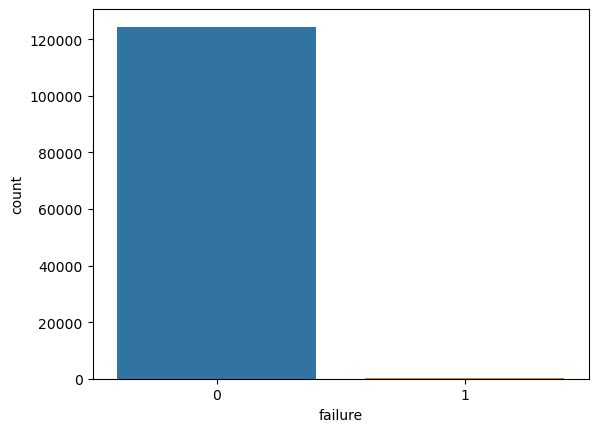

In [30]:
sns.countplot(x=df.failure)

## Using SMOTE()

First i should import SMOTE(). But if it isn't installed in your computer you can install with this code: pip install -U scikit-learn imbalanced-learn.

In [32]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

That makes our data more balanced.

<Axes: xlabel='failure', ylabel='count'>

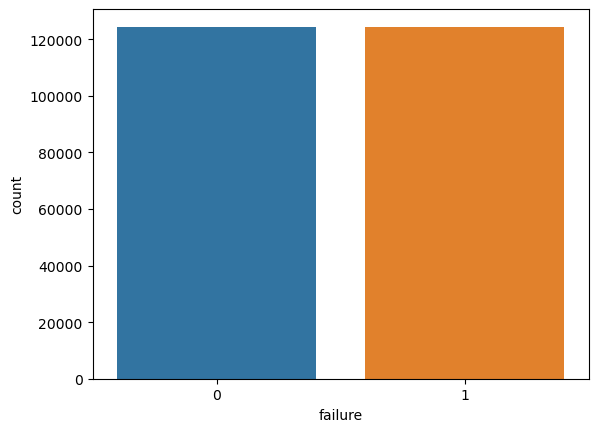

In [35]:
sns.countplot(x=y["failure"])

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state=42)

I'm doing train_test_split again.

## Modelling

In [37]:
g.fit(x_train,y_train)

GaussianNB()

In [38]:
g_prediction=g.predict(x_test)

In [39]:
accuracy_score(g_prediction,y_test)

0.5805330010451001

In [42]:
from sklearn.naive_bayes import BernoulliNB
b=BernoulliNB()
b.fit(x_train,y_train)
b_prediction=b.predict(x_test)
accuracy_score(b_prediction,y_test)

0.969893078221722

In [43]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()
l.fit(x_train,y_train)
l_prediction=l.predict(x_test)
accuracy_score(l_prediction,y_test)

0.7877642897339014

In [44]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
d_prediction=d.predict(x_test)
accuracy_score(d_prediction,y_test)

0.9977490151941475

My models gave very different accuracy scores. The highest of these was DecisionTreeClassifier. Some gave very low results. However, thanks to SMOTE(), I achieved more balanced and accurate learning. You can also try other models.